In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import *
from keras.layers import *
from keras.metrics import Recall
from PIL import Image
from numpy import asarray
import sklearn
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
! wget http://cb.lk/covid_19
! unzip covid_19

--2022-09-15 08:56:50--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-09-15 08:56:51--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-09-15 08:56:51--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-09-15 08:56:52

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255,)

train_set = train_datagen.flow_from_directory('/content/CovidDataset/Train', 
                                              target_size=(224,244), 
                                              batch_size=32, 
                                              class_mode='binary', 
                                              shuffle=False)

test_set = test_datagen.flow_from_directory('/content/CovidDataset/Val', 
                                              target_size=(224,244), 
                                              batch_size=32, 
                                              class_mode='binary', 
                                              shuffle=False)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [4]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [5]:
test_set.filenames

['Covid/16654_1_1.png',
 'Covid/16654_2_1.jpg',
 'Covid/16654_4_1.jpg',
 'Covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png',
 'Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg',
 'Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg',
 'Covid/4-x-day1.jpg',
 'Covid/41591_2020_819_Fig1_HTML.webp-day10.png',
 'Covid/41591_2020_819_Fig1_HTML.webp-day5.png',
 'Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg',
 'Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg',
 'Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg',
 'Covid/6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg',
 'Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg',
 'Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg',
 'Covid/6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg',
 'Covid/7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg',
 'Covid/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg',
 'Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg',
 'Covid/88de9d8c39e946abd495b37cd07d89e5-2ee6-0.jpg',
 'Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg',
 'Covi

In [6]:
train_set.class_indices

{'Covid': 0, 'Normal': 1}

In [7]:
test_set[1]

(array([[[[0.3019608 , 0.3019608 , 0.3019608 ],
          [0.30980393, 0.30980393, 0.30980393],
          [0.3254902 , 0.3254902 , 0.3254902 ],
          ...,
          [0.29411766, 0.29411766, 0.29411766],
          [0.30980393, 0.30980393, 0.30980393],
          [0.3647059 , 0.3647059 , 0.3647059 ]],
 
         [[0.29411766, 0.29411766, 0.29411766],
          [0.30588236, 0.30588236, 0.30588236],
          [0.3137255 , 0.3137255 , 0.3137255 ],
          ...,
          [0.31764707, 0.31764707, 0.31764707],
          [0.30588236, 0.30588236, 0.30588236],
          [0.427451  , 0.427451  , 0.427451  ]],
 
         [[0.2784314 , 0.2784314 , 0.2784314 ],
          [0.29803923, 0.29803923, 0.29803923],
          [0.3137255 , 0.3137255 , 0.3137255 ],
          ...,
          [0.31764707, 0.31764707, 0.31764707],
          [0.38823533, 0.38823533, 0.38823533],
          [0.5058824 , 0.5058824 , 0.5058824 ]],
 
         ...,
 
         [[0.23137257, 0.23137257, 0.23137257],
          [0.33725

(224, 244, 3)

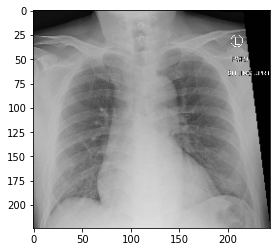

In [8]:
plt.imshow(test_set[0][0][0])
test_set[0][0][0].shape

In [9]:
from keras.layers import Dense, Input, Dropout,Conv2D,AvgPool2D,Flatten

model = keras.Sequential()
model.add(Input(shape=(224, 224,3)))

#  model.add(Conv2D(filters=6,kernel_size=5,strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(filters=96,kernel_size=11,strides=(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=5,strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(filters=384,kernel_size=3,strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(filters=384,kernel_size=3,strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(filters=384,kernel_size=3,strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))




model.add(Flatten()) 
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [10]:
model.compile(optimizer='sgd',loss= 'binary_crossentropy',metrics=['accuracy',Recall()])


In [11]:
#results = model.fit(x=x_train, y=y_train,shuffle=True,epochs=10)
results=model.fit(
    train_set,
    shuffle=True,
    epochs=20,
    validation_data=(test_set),
    steps_per_epoch=len(train_set)
    #validation_steps=len(test_set)
    )

Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 0.6999 - accuracy: 0.4107 - recall: 0.8125 - val_loss: 0.6907 - val_accuracy: 0.5333 - val_recall: 1.0000
Epoch 2/20
7/7 [==============================] - 7s 1s/step - loss: 0.6966 - accuracy: 0.3750 - recall: 0.7143 - val_loss: 0.6892 - val_accuracy: 0.5333 - val_recall: 1.0000
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.6947 - accuracy: 0.3616 - recall: 0.1875 - val_loss: 0.6882 - val_accuracy: 0.5000 - val_recall: 1.0000
Epoch 4/20
7/7 [==============================] - 7s 1s/step - loss: 0.6938 - accuracy: 0.3884 - recall: 0.7679 - val_loss: 0.6870 - val_accuracy: 0.5167 - val_recall: 1.0000
Epoch 5/20
7/7 [==============================] - 7s 953ms/step - loss: 0.6926 - accuracy: 0.5670 - recall: 0.9554 - val_loss: 0.6858 - val_accuracy: 0.5167 - val_recall: 1.0000
Epoch 6/20
7/7 [==============================] - 7s 1s/step - loss: 0.6908 - accuracy: 0.5223 - recall: 0.2946 - val_los

In [12]:
score = model.evaluate(test_set)

2/2 [==============================] - 2s 494ms/step - loss: 0.6365 - accuracy: 0.9667 - recall: 0.9667


In [18]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import save_model
model.save('/content/drive/MyDrive/savedModels/covid-19.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
pred = model.predict(test_set)
pred = ((pred>=0.5).astype(int))
pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [15]:
# from numpy import argmax
# pred1 = argmax(pred,axis=1)

In [16]:
# plt.imshow(x_test[230],cmap='gray')
# print(pred[230])
# print(pred1[230])

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,test_set.labels))
print(accuracy_score(pred, test_set.labels))

[[29  1]
 [ 1 29]]
0.9666666666666667
